In [ ]:
from google.colab import files
uploaded = files.upload()

Saving patient_info_practicefusion.csv to patient_info_practicefusion (7).csv
Saving diabetes-pimaindian.csv to diabetes-pimaindian (7).csv


In [ ]:
import pandas as pd

pima_df = pd.read_csv("diabetes-pimaindian.csv")
practicefusion_df = pd.read_csv("patient_info_practicefusion.csv")

print("Pima Indians Dataset:")
print(pima_df.head())

print("\nPractice Fusion Dataset:")
print(practicefusion_df.head())


Pima Indians Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Practice Fusion Dataset:
                            PatientGuid  Gender  Age  Height_Min  Height_Avg  \
0  00AB891C-67A0-4528-9EC2-50DD7AB368AB       1   34        66.0       66.00   
1  3C322598-5E8F-4BF2-8EF1-8843FC9B1851       1   53        63.0       63.00   
2  C5D41CE5-13F

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_pima = pima_df.drop("Outcome", axis=1)
y_pima = pima_df["Outcome"]

X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_pima = scaler.fit_transform(X_train_pima)
X_test_pima = scaler.transform(X_test_pima)

In [ ]:
features = ['Age', 'Gender', 'BMI_Avg', 'SBP_Avg', 'DBP_Avg']
X_practicefusion = practicefusion_df[features]
y_practicefusion = practicefusion_df["Outcome"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_practicefusion, y_practicefusion, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_pf = scaler.fit_transform(X_train_pf)
X_test_pf = scaler.transform(X_test_pf)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def train_knn(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- kNN Results for {dataset_name} Dataset ---")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("\nkNN Classification Report:")
    print(classification_report(y_test, predictions))

train_knn(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians")

train_knn(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion")


--- kNN Results for Pima Indians Dataset ---
Shape of X_train: (614, 8)
Shape of y_train: (614,)
Shape of X_test: (154, 8)
Shape of y_test: (154,)

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154


--- kNN Results for Practice Fusion Dataset ---
Shape of X_train: (7957, 5)
Shape of y_train: (7957,)
Shape of X_test: (1990, 5)
Shape of y_test: (1990,)

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1628
           1       0.29      0.15      0.20       362

    accuracy                           0.78      1990
   macro avg       0.56      0.54      0.54      1990
weighted avg       0.73      0.78      0.7

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train_logistic(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- Logistic Regression Results for {dataset_name} Dataset ---")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print("\nLogistic Regression Classification Report:")
    print(classification_report(y_test, predictions))

train_logistic(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians")

train_logistic(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion")


--- Logistic Regression Results for Pima Indians Dataset ---
Shape of X_train: (614, 8)
Shape of y_train: (614,)
Shape of X_test: (154, 8)
Shape of y_test: (154,)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


--- Logistic Regression Results for Practice Fusion Dataset ---
Shape of X_train: (7957, 5)
Shape of y_train: (7957,)
Shape of X_test: (1990, 5)
Shape of y_test: (1990,)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1628
           1       0.34      0.05      0.08       362

    accuracy                           0.81      1990
   macro avg       0.58      0.5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

def train_decision_tree(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- Decision Tree Results for {dataset_name} Dataset ---")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("\nDecision Tree Classification Report:")
    print(classification_report(y_test, predictions))

train_decision_tree(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians")

train_decision_tree(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion")


--- Decision Tree Results for Pima Indians Dataset ---
Shape of X_train: (614, 8)
Shape of y_train: (614,)
Shape of X_test: (154, 8)
Shape of y_test: (154,)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154


--- Decision Tree Results for Practice Fusion Dataset ---
Shape of X_train: (7957, 5)
Shape of y_train: (7957,)
Shape of X_test: (1990, 5)
Shape of y_test: (1990,)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1628
           1       0.49      0.19      0.27       362

    accuracy                           0.82      1990
   macro avg       0.67      0.57      0.58      1990
we

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def train_random_forest(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- Random Forest Results for {dataset_name} Dataset ---")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, predictions))

train_random_forest(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians")

train_random_forest(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion")


--- Random Forest Results for Pima Indians Dataset ---
Shape of X_train: (614, 8)
Shape of y_train: (614,)
Shape of X_test: (154, 8)
Shape of y_test: (154,)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


--- Random Forest Results for Practice Fusion Dataset ---
Shape of X_train: (7957, 5)
Shape of y_train: (7957,)
Shape of X_test: (1990, 5)
Shape of y_test: (1990,)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1628
           1       0.47      0.19      0.27       362

    accuracy                           0.81      1990
   macro avg       0.65      0.57      0.58      1990
we

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

def train_gradient_boosting(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- Gradient Boosting Results for {dataset_name} Dataset ---")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    model = GradientBoostingClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("\nGradient Boosting Classification Report:")
    print(classification_report(y_test, predictions))

train_gradient_boosting(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians")

train_gradient_boosting(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion")


--- Gradient Boosting Results for Pima Indians Dataset ---
Shape of X_train: (614, 8)
Shape of y_train: (614,)
Shape of X_test: (154, 8)
Shape of y_test: (154,)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


--- Gradient Boosting Results for Practice Fusion Dataset ---
Shape of X_train: (7957, 5)
Shape of y_train: (7957,)
Shape of X_test: (1990, 5)
Shape of y_test: (1990,)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1628
           1       0.54      0.12      0.20       362

    accuracy                           0.82      1990
   macro avg       0.69      0.55      0

In [ ]:
from sklearn.ensemble import VotingClassifier

def train_ensemble(X_train, X_test, y_train, y_test):
    ensemble_model = VotingClassifier(estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('logistic', LogisticRegression()),
        ('rf', RandomForestClassifier(n_estimators=100))
    ], voting='soft')
    ensemble_model.fit(X_train, y_train)
    predictions = ensemble_model.predict(X_test)
    print("Ensemble Model Classification Report:")
    print(classification_report(y_test, predictions))

print("Ensemble Results for Pima Indians Dataset:")
train_ensemble(X_train_pima, X_test_pima, y_train_pima, y_test_pima)

print("Ensemble Results for Practice Fusion Dataset:")
train_ensemble(X_train_pf, X_test_pf, y_train_pf, y_test_pf)


Ensemble Results for Pima Indians Dataset:
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

Ensemble Results for Practice Fusion Dataset:
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1628
           1       0.43      0.08      0.13       362

    accuracy                           0.81      1990
   macro avg       0.63      0.53      0.51      1990
weighted avg       0.75      0.81      0.76      1990



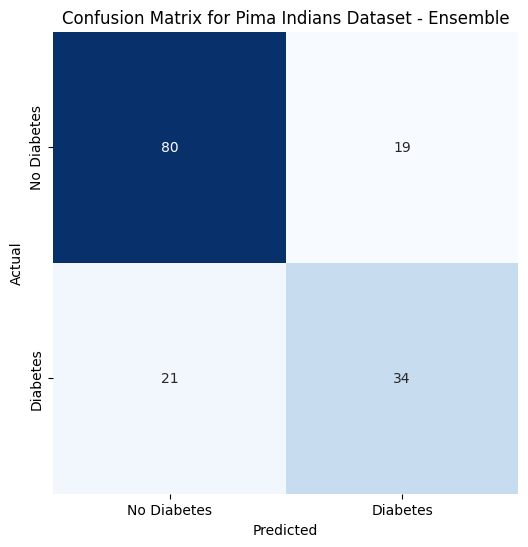

Classification Report for Pima Indians Dataset - Ensemble:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



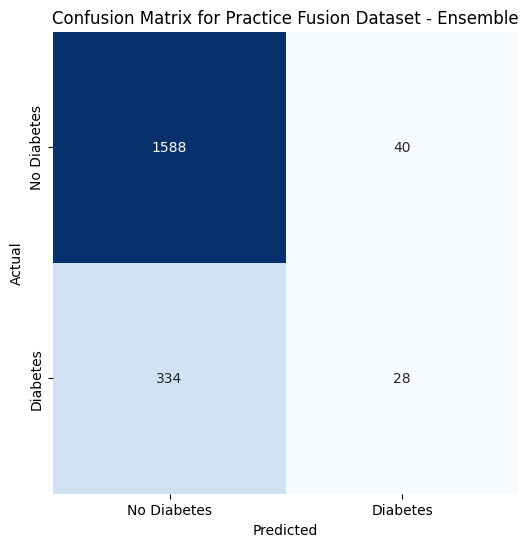

Classification Report for Practice Fusion Dataset - Ensemble:
              precision    recall  f1-score   support

           0       0.83      0.98      0.89      1628
           1       0.41      0.08      0.13       362

    accuracy                           0.81      1990
   macro avg       0.62      0.53      0.51      1990
weighted avg       0.75      0.81      0.76      1990



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_and_visualize_ensemble(X_train, X_test, y_train, y_test, dataset_name):
    ensemble_model = VotingClassifier(estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('logistic', LogisticRegression()),
        ('rf', RandomForestClassifier(n_estimators=100))
    ], voting='soft')
    ensemble_model.fit(X_train, y_train)
    predictions = ensemble_model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix for {dataset_name} - Ensemble")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"Classification Report for {dataset_name} - Ensemble:")
    print(classification_report(y_test, predictions))

train_and_visualize_ensemble(X_train_pima, X_test_pima, y_train_pima, y_test_pima, "Pima Indians Dataset")
train_and_visualize_ensemble(X_train_pf, X_test_pf, y_train_pf, y_test_pf, "Practice Fusion Dataset")